## Assignment 1: 

### Tasks:
- Read WineQuality.pdf (content pasted below)
- Use the RedWhiteWine.csv that is provided (downloaded).
  - Note: If needed, remove the quality attribute, which you will not need for this assignment.
- Build an experiment using Naive Bayes Classifier.

### Determine:
- What is the percentage of correct classification results (using all attributes)?
- What is the percentage of correct classification results (using a subset of the attributes)?
- What is the AUC of your model? 
- What is the best AUC that you can achieve?
- Which are the the minimum number of attributes that allows you to properly classify 95% of the samples? Why?

### Submission:
- Submit a 1-pager highlight your solution, and answering the 5 questions above

## WineQuality.pdf
Dataset: Wine Quality

Attributes: 11 numeric, 1 nominal

Class: Numeric

Instances: 6497

Missing Values: None

In the original form of this dataset, two datasets were created, using red and white wine samples. Here, tese two datasets have been combined into one dataset. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Attributes:
- 1 - fixed acidity, numeric
- 2 - volatile acidity, numeric
- 3 - citric acid, numeric
- 4 - residual sugar, numeric
- 5 – chlorides, numeric
- 6 - free sulfur dioxide, numeric
- 7 - total sulfur dioxide, numeric
- 8 – density, numeric
- 9 – pH, numeric
- 10 – sulphates, numeric
- 11 – alcohol, numeric
- 12 – R/W, nominal – R= red, W = white

Class:
 quality (score between 0 and 10)

Reference:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553.

In [1]:
#import
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#from sklearn import svm
#from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp
#from sklearn.preprocessing import label_binarize
#import scikitplot as skplt


In [36]:
#load RedWhiteWine.CSV, use column headers in file, remove quality column
wine_data = pd.read_csv('RedWhiteWine.csv', usecols=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                                                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                                                "sulphates", "alcohol", "Class"])

#Load RedWhiteWine.CSV, use column headers in file, remove quality and residual sugar, total sulfur dioxide, and alcohol 
#(these last 3 characteristics displayed slightly non-normal distribution, testing if it makes a difference in accuracy
wine_data_normal = pd.read_csv('RedWhiteWine.csv', usecols=["fixed acidity", "volatile acidity", "citric acid", "chlorides", 
                                                "free sulfur dioxide", "density", "pH", 
                                                "sulphates", "Class"])
#Load RedWhiteWine.CSV, use column headers in file, use sulphates and Class only 
#testing if it makes a difference in accuracy
wine_data_sulphates = pd.read_csv('RedWhiteWine.csv', usecols=["sulphates", "Class"])



In [3]:
wine_data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [4]:
wine_data.shape

(6497, 12)

In [5]:
wine_data_normal.shape

(6497, 9)

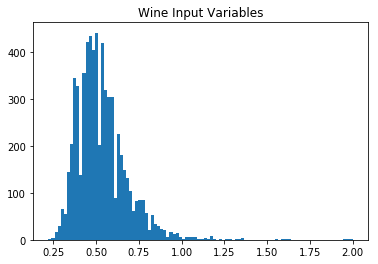

In [6]:
#plot input variables to confirm approximate gaussian distribution of each
#plt.hist(wine_data['fixed acidity'], bins='auto')
#plt.hist(wine_data['volatile acidity'], bins='auto')
#plt.hist(wine_data['citric acid'], bins='auto')
##plt.hist(wine_data['residual sugar'], bins='auto')
#plt.hist(wine_data['chlorides'], bins='auto')
#plt.hist(wine_data['free sulfur dioxide'], bins='auto')
##plt.hist(wine_data['total sulfur dioxide'], bins='auto')
#plt.hist(wine_data['density'], bins='auto')
#plt.hist(wine_data['pH'], bins='auto')
plt.hist(wine_data['sulphates'], bins='auto')
##plt.hist(wine_data['alcohol'], bins='auto')

plt.title("Wine Input Variables")


plt.show()

#By eyeball test, all look roughly normally distributed except: residual sugar, total sulfur dioxide, and alcohol


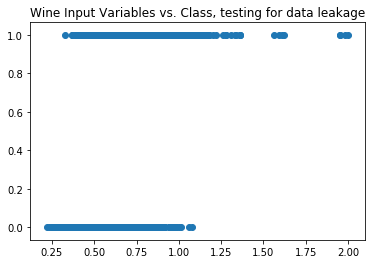

In [34]:
#plot each variable against Class, to test for data leakage
#plt.scatter(wine_data['fixed acidity'], wine_data['Class'])
#plt.scatter(wine_data['volatile acidity'], wine_data['Class'])
#plt.scatter(wine_data['citric acid'], wine_data['Class'])
#plt.scatter(wine_data['residual sugar'], wine_data['Class'])
#plt.scatter(wine_data['chlorides'], wine_data['Class'])
#plt.scatter(wine_data['free sulfur dioxide'], wine_data['Class'])
#plt.scatter(wine_data['total sulfur dioxide'], wine_data['Class'])
#plt.scatter(wine_data['density'], wine_data['Class'])
#plt.scatter(wine_data['pH'], wine_data['Class'])
plt.scatter(wine_data['sulphates'], wine_data['Class'])
#plt.scatter(wine_data['alcohol'], wine_data['Class'])

plt.title("Wine Input Variables vs. Class, testing for data leakage")
plt.show()

#None appear to be data leakage

In [35]:
#num_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
#                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
#                'sulphates', 'alcohol']
#calculate the mean and standard deviation, for gnb, of each of the now numeric features
#scaled_features = {}
#for each in num_features:
#    mean, std = wine_data[each].mean(), wine_data[each].std()
#    scaled_features[each] = [mean, std]
#    wine_data.loc[:, each] = (wine_data[each] - mean)/std

In [10]:
#divide the data into 75% train and 25% test
#note, this method is manual, as opposed to using the test/training function: 
#trainSet, testSet = train_test_split(attribute_data, test_size = 0.25)

msk = np.random.rand(wine_data.shape[0]) <= 0.75
wine_train = wine_data.iloc[msk, 0:11]
wine_train_target = wine_data.iloc[msk, 11]
wine_test = wine_data.iloc[~msk, 0:11]
wine_test_target = wine_data.iloc[~msk, 11]

In [11]:
wine_train.shape

(4878, 11)

In [12]:
wine_test.shape

(1619, 11)

In [13]:
gnb = GaussianNB()

In [14]:
gnb_model = gnb.fit(wine_train, wine_train_target)

In [15]:
#make a prediction from the trained model on your test set
y_pred = gnb_model.predict(wine_test)

#test how many mislabeled points you have
misclassified_points = (wine_test_target != y_pred).sum()

#print out your accuracy calculations
print("Number of mislabeled points out of a total %d points : %d"\
      % (wine_test.shape[0], misclassified_points))
print("Accuracy (using all 11 characteristics) = %.2f"%(round((wine_test.shape[0] - float(misclassified_points))/wine_test.shape[0]*100,2)))

Number of mislabeled points out of a total 1619 points : 50
Accuracy (using all 11 characteristics) = 96.91


In [16]:
#divide the data into 75% train and 25% test
#note, this method is very manual, as opposed to using the test/training function: 
#trainSet, testSet = train_test_split(attribute_data, test_size = 0.25)

msk = np.random.rand(wine_data_normal.shape[0]) <= 0.75
wine_train_normal = wine_data_normal.iloc[msk, 0:8]
wine_train_target_normal = wine_data_normal.iloc[msk, 8]
wine_test_normal = wine_data_normal.iloc[~msk, 0:8]
wine_test_target_normal = wine_data_normal.iloc[~msk, 8]

In [17]:
gnb_normal = GaussianNB()
gnb_model_normal = gnb_normal.fit(wine_train_normal, wine_train_target_normal)


In [18]:
#make a prediction from the trained model on your test set
y_pred_normal = gnb_model_normal.predict(wine_test_normal)

#test how many mislabeled points you have
misclassified_points_normal = (wine_test_target_normal != y_pred_normal).sum()

#print out your accuracy calculations
print("Number of mislabeled points out of a total %d points : %d"\
      % (wine_test_normal.shape[0], misclassified_points_normal))
print("Accuracy (not using residual sugar, total sulfur dioxide, and alcohol) = %.2f"%(round((wine_test_normal.shape[0] - float(misclassified_points_normal))/wine_test_normal.shape[0]*100,2)))

Number of mislabeled points out of a total 1651 points : 85
Accuracy (not using residual sugar, total sulfur dioxide, and alcohol) = 94.85


In [38]:
#divide the data into 75% train and 25% test
#note, this method is manual, as opposed to using the test/training function: 
#trainSet, testSet = train_test_split(attribute_data, test_size = 0.25)

msk = np.random.rand(wine_data.shape[0]) <= 0.75
wine_train_sulphates = wine_data_sulphates.iloc[msk, 0:1]
wine_train_target_sulphates = wine_data_sulphates.iloc[msk, 1]
wine_test_sulphates = wine_data_sulphates.iloc[~msk, 0:1]
wine_test_target_sulphates = wine_data_sulphates.iloc[~msk, 1]

gnb_sulphates = GaussianNB()
gnb_model_sulphates = gnb_sulphates.fit(wine_train_sulphates, wine_train_target_sulphates)

#make a prediction from the trained model on your test set
y_pred_sulphates = gnb_model_sulphates.predict(wine_test_sulphates)

#test how many mislabeled points you have
misclassified_points_sulphates = (wine_test_target_sulphates != y_pred_sulphates).sum()

#print out your accuracy calculations
print("Number of mislabeled points out of a total %d points : %d"\
      % (wine_test_sulphates.shape[0], misclassified_points_sulphates))
print("Accuracy (using sulphates only) = %.2f"%(round((wine_test_sulphates.shape[0] - float(misclassified_points_sulphates))/wine_test_sulphates.shape[0]*100,2)))

Number of mislabeled points out of a total 1630 points : 333
Accuracy (using sulphates only) = 79.57


In [19]:
#calculate FPR and TPR for ROC curve plot with all 11 characteristics
fpr, tpr, threshold = metrics.roc_curve(wine_test_target, y_pred)

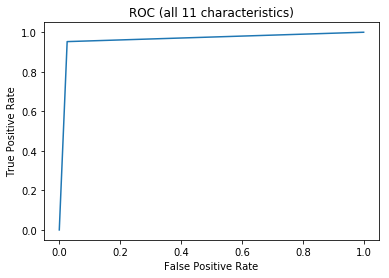

In [23]:
#plot the ROC
plt.plot(fpr,tpr)
plt.title("ROC (all 11 characteristics)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# Area under the ROC curve
auc = metrics.auc(fpr, tpr)
print("The AUC = ", auc)

The AUC =  0.963402149441


In [27]:
#calculate FPR and TPR for ROC curve plot with 8 characteristics
fpr_normal, tpr_normal, threshold_normal = metrics.roc_curve(wine_test_target_normal, y_pred_normal)

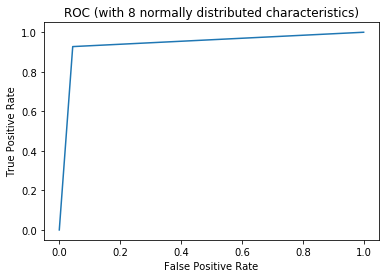

In [28]:
#plot the ROC
plt.plot(fpr_normal,tpr_normal)
plt.title("ROC (with 8 normally distributed characteristics)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# Area under the ROC curve
auc_normal = metrics.auc(fpr_normal, tpr_normal)
print("The AUC = ", auc_normal)

The AUC =  0.941641410663


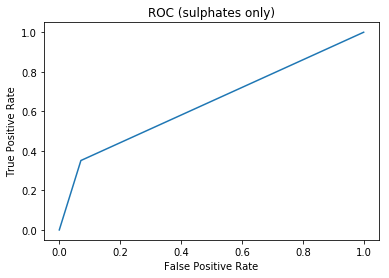

The AUC =  0.640045471512


In [40]:
#calculate FPR and TPR for ROC curve plot with sulphates only
fpr_sulphates, tpr_sulphates, threshold_sulphates = metrics.roc_curve(wine_test_target_sulphates, y_pred_sulphates)

#plot the ROC
plt.plot(fpr_sulphates,tpr_sulphates)
plt.title("ROC (sulphates only)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Area under the ROC curve
auc_sulphates = metrics.auc(fpr_sulphates, tpr_sulphates)
print("The AUC = ", auc_sulphates)